<h1>Ejercicio 1: Exploratory Data Analysis</h1>

<h2> Objetivo </h2>
Generar funciones en Julia que ayuden a la limpieza de datos de exploración:

* dataShape: obtiene la forma de los datos
* dataType: da el tipo de datos de cada columna en el conjunto de datos
* count_missing(col): cuenta el número de datos faltantes en una columna dada.
* dataMissingPercentage(): encuentra el porcentaje de datos faltantes de cada columna.
* deleteColumns(threshold): elimina todas las columnas que tienen un porcentaje de datos faltantes menor al umbral dado.
* calculateCorrelation(): crea una matriz de correlación entre las columnas.
* displayCorrelation(): muestra la correlación utilizando un mapa de calor.
* removeOutliersIQR(): usando el rango intercuartílico elimina todos los valores atípicos de las columnas numéricas.
* deleteRow(column): para una columna dada, elimina todos los puntos de datos nulos.
* filterColumnsByCorrelation(target, threshold, relation): elimina todas las columnas en función del umbral dado para una columna objetivo y su relación.
* describe(): se utiliza para describir los datos proporcionando lo siguiente para cada columna.

Las cuales se integraron al archivo: exploratoryDataAnalysis.jl

Para poder describir los datos, primero importaremos el paquete y datos:

In [29]:
include("exploratoryDataAnalysis.jl")

#ruta de información
ruta="dat/bottle.csv"
ruta_fig_sin_quitar_correlaciones="fig/Correlation_heatmap.png"
ruta_fig_baja_correlacion="fig/Low_Correlation_heatmap.png"
            
#leer csv
df=leer_csv_como_dataframe(ruta)
println("Se leyó dataFrame original")

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


El paquete "CSV" ya está instalado.
El paquete "CSV" se ha cargado exitosamente.
El paquete "DataFrames" ya está instalado.
El paquete "DataFrames" se ha cargado exitosamente.
El paquete "Statistics" ya está instalado.
El paquete "Statistics" se ha cargado exitosamente.
El paquete "CairoMakie" ya está instalado.
El paquete "CairoMakie" se ha cargado exitosamente.
El archivo "dat/bottle.csv" se ha cargado exitosamente.


┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787
┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /Users/fau/.julia/juliaup/julia-1.11.1+0.aarch64.apple.darwin14/share/julia/stdlib/v1.11/Pkg/src/Pkg.jl:787


Se leyó dataFrame original


<h2> Función dataShape</h2>

función que devuelve en un vector de dos elementos: el número de filas y número de columnas de un DataFrame.

In [30]:
####################################

function dataShape(df)
    forma = size(df)
    println("Número de filas: ", forma[1])  # Primer valor de la tupla: número de filas
    println("Número de columnas: ", forma[2])  # Segundo valor de la tupla: número de columnas
   return forma
end

dataShape (generic function with 1 method)

Ejemplo de uso:

In [31]:
dataShape(df)

Número de filas: 864863
Número de columnas: 74


(864863, 74)

<h2> Función dataType</h2>

Da el tipo de datos de cada columna en el conjunto de datos

Para conseguir está función decidí que devolviera un diccionario con el nombre de columna de cada DataFrame así como sus respectivos vectores.

In [32]:
function dataType(df,print=false)
    # Crear un diccionario para almacenar los tipos de datos de cada columna
    dic_tipos_columnas = Dict()
    # Iterar sobre las columnas y almacenar su tipo
    for columna in names(df)
        dic_tipos_columnas[columna] = eltype(df[!, columna])
    end
    # Mostrar el diccionario con los tipos de datos
    if print==true
        println("Se creó el diccionario con el nombre de columna como llave y tipo de dato como valor del dataframe")
    else
    end
    # Obtener las llaves como un vector
    nombres_columnas = collect(keys(dic_tipos_columnas))
    # Mostrar el resultado
    if print==true
    println("Se creó el vector con el nombre de columnas del dataframe")
    else
    end
    # Obtener las llaves como un vector
    datatype_columnas = collect(values(dic_tipos_columnas))
    # Mostrar el resultado
    if print==true
    println("Se creó el vector con el tipo de dato de cada columna del dataframe")
    else
    end
    # Mostrar el resultado
    if print==true
        for (llave, valor) in zip(nombres_columnas, datatype_columnas)
            valor_dir = dic_tipos_columnas[llave]
            println("El campo |$llave| tiene el tipo de dato |$valor")
        end
    else
        nothing
    end

    return dic_tipos_columnas, nombres_columnas, datatype_columnas
end

dataType (generic function with 2 methods)

Ejemplo:

In [33]:
dic_tipos_columnas, nombres_columnas, datatype_columnas=dataType(df,true)

Se creó el diccionario con el nombre de columna como llave y tipo de dato como valor del dataframe
Se creó el vector con el nombre de columnas del dataframe
Se creó el vector con el tipo de dato de cada columna del dataframe
El campo |pH2| tiene el tipo de dato |Union{Missing, Float64}
El campo |SiO3uM| tiene el tipo de dato |Union{Missing, Float64}
El campo |LightP| tiene el tipo de dato |Union{Missing, Float64}
El campo |MeanAp| tiene el tipo de dato |Union{Missing, Int64}
El campo |Cst_Cnt| tiene el tipo de dato |Int64
El campo |TA2| tiene el tipo de dato |Union{Missing, Float64}
El campo |R_O2| tiene el tipo de dato |Union{Missing, Float64}
El campo |R_DYNHT| tiene el tipo de dato |Union{Missing, Float64}
El campo |TA1| tiene el tipo de dato |Union{Missing, Float64}
El campo |O2Satq| tiene el tipo de dato |Union{Missing, Int64}
El campo |DarkAs| tiene el tipo de dato |Union{Missing, Float64}
El campo |PO4q| tiene el tipo de dato |Union{Missing, Int64}
El campo |R_SVA| tiene el tipo

(Dict{Any, Any}("pH2" => Union{Missing, Float64}, "SiO3uM" => Union{Missing, Float64}, "LightP" => Union{Missing, Float64}, "MeanAp" => Union{Missing, Int64}, "Cst_Cnt" => Int64, "TA2" => Union{Missing, Float64}, "R_O2" => Union{Missing, Float64}, "R_DYNHT" => Union{Missing, Float64}, "TA1" => Union{Missing, Float64}, "O2Satq" => Union{Missing, Int64}…), Any["pH2", "SiO3uM", "LightP", "MeanAp", "Cst_Cnt", "TA2", "R_O2", "R_DYNHT", "TA1", "O2Satq"  …  "ChlorA", "C14A1q", "Btl_Cnt", "NH3uM", "C14A2p", "R_PHAEO", "R_PRES", "Oxy_µmol/Kg", "NO2uM", "DarkAq"], Any[Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}, Int64, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int64}  …  Union{Missing, Float64}, Union{Missing, Int64}, Int64, Union{Missing, Float64}, Union{Missing, Int64}, Union{Missing, Float64}, Int64, Union{Missing, Float64}, Union{Missing, Float64}, Union{Missing, Int6

<h2> Función count_missing</h2>

cuenta el número de datos faltantes en una columna dada.

In [34]:
function count_missing(col)
    return sum(ismissing.(col))
end

count_missing (generic function with 1 method)

Ejemplo:

In [35]:
count_missing(df.pH2)

864853

<h2> Función dataMissingPercentage</h2>

encuentra el porcentaje de datos faltantes de cada columna.

In [36]:
#Cuenta valores nulos y no nulos 
function contar_valores_missing_and_not(col)
    num_missing = count_missing(col)      # Contar valores faltantes (missing)
    num_no_missing = length(col) - num_missing  # Calcular no faltantes
    return num_missing, num_no_missing
end
####################################
#Saca el porcentaje como decimal de los valores nulos o no nulos.
function dataMissingPercentage(col)
    num_missing, num_no_missing = contar_valores_missing_and_not(col)
    colMissingPercentage=num_missing/(num_missing+num_no_missing)
    #println("Los casos son:", num_missing+num_no_missing)
    #println("numero de campos vacios:",num_missing)
    return colMissingPercentage
end

dataMissingPercentage (generic function with 1 method)

Ejemplo:

In [37]:
dataMissingPercentage(df.pH2)

0.9999884374750683

<h2> Función deleteColumns</h2>

elimina todas las columnas que tienen un porcentaje de datos faltantes menor al umbral dado.

In [38]:
function deleteColumns(df,threshold, loggs=false)
    columnsToEliminate=[]
    nThresholdToEliminate=0
    dic_tipos_columnas, nombres_columnas, datatype_columnas=dataType(df,false)
    n=0
    for llaves in nombres_columnas
        n+=1
        if loggs==true
            println(n, ".-Columna: ", llaves)
        else
        end
        cuenta_vacios_de_columna=round(dataMissingPercentage(df[:, llaves])*10000)/100
       #println("% de vacios: ", cuenta_vacios_de_columna,"y es >=", threshold,":",cuenta_vacios_de_columna  >= threshold )
        if cuenta_vacios_de_columna >= threshold
            #println("Cumple el threshold de >=,", threshold, "y se elimina")
            #println("El porcentaje de no vacíos de la columna: ",llaves," es ",cuenta_vacios_de_columna, "% y supera el threshold de: ",threshold,"%, por lo que se elimina")
            push!(columnsToEliminate, llaves)
            nThresholdToEliminate+=1
        else
            if loggs == true
                println("El porcentaje de no vacíos de la columna: ",llaves," es: ",cuenta_vacios_de_columna, "% y no supera el threshold de: ",threshold,"%, por lo que se mantiene")
            else
            end
        end
    end
    println("El número de columnas a eliminar es: ",nThresholdToEliminate)
    return select(df, Not(columnsToEliminate))
end

deleteColumns (generic function with 2 methods)

Ejemplo:

In [39]:
 #----Definir threshold
 threshold=10
 #----Eliminar columnas según el threshold de datos missing
 df2=deleteColumns(df,threshold)
 dataShape(df2)

El número de columnas a eliminar es: 50
Número de filas: 864863
Número de columnas: 24


(864863, 24)

<h2> Función calculateCorrelation</h2>

crea una matriz de correlación entre las columnas.

In [40]:
function calculateCorrelation(df)
    df2=dropmissing(df)
    return cor(Matrix(df2))
end

calculateCorrelation (generic function with 1 method)

Para aplicar esta función a nuestro df necesitamos garantizar que sólo sean valores numericos, por ello la función tiene un dropmissing.

In [41]:
df3=eliminarStringsDf(df2)
println("DataFrame Sin Strings")
dataShape(df3)
matrizCorrelacion3=calculateCorrelation(df3)

El número de columnas conservadas que no son String son: 22
DataFrame Sin Strings
Número de filas: 864863
Número de columnas: 22


22×22 Matrix{Float64}:
  1.0          0.999224    -0.123269    …  -0.111903    -0.123048
  0.999224     1.0         -0.122971       -0.112167    -0.122743
 -0.123269    -0.122971     1.0             0.927856     0.999994
  0.04092      0.0423371   -0.67872        -0.79626     -0.677391
 -0.15803     -0.15484      0.56681         0.659835     0.565652
 -0.059088    -0.0589562    0.577632    …   0.692621     0.576397
 -0.0957365   -0.0961299    0.0845616       0.090808     0.0844353
  0.100194     0.0947503    0.0214924       0.0140545    0.0215216
  0.415998     0.414659     0.0248428       0.0405515    0.0248617
 -0.197724    -0.204112     0.0091432      -0.00846518   0.00901806
  ⋮                                     ⋱   ⋮           
 -0.00335554  -0.00324095   0.00199621      0.00294875   0.00198931
 -0.123265    -0.122968     1.0             0.927855     0.999994
  0.0409234    0.0423406   -0.67872     …  -0.79626     -0.677391
  0.041361     0.0427678   -0.681549       -0.798398   

<h2> Función displayCorrelation</h2>

muestra la correlación utilizando un mapa de calor.

In [42]:
#Crear heatmap
function displayCorrelation(matrizCorrelacion, ruta::String)
    println("entrar a crear mapa")
    directorio_actual = @__DIR__
    # Construir la ruta al directorio superior (un nivel arriba)
    ruta_superior = joinpath(directorio_actual, "..")
    # Convertir la ruta superior a una ruta absoluta (resuelve los "..")
    ruta_absoluto_superior = realpath(ruta_superior)
    # Superior
    ruta_fig = joinpath(ruta_absoluto_superior, ruta)
    # Leer el archivo CSV y convertirlo en un DataFrame

    println(ruta_fig)

    # Plot the heatmap
    println("Inicio heatmap")
    
    fig, ax, hm = heatmap(
        matrizCorrelacion;
        colormap = :coolwarm,  # Diverging color scheme
        colorrange = (-1, 1),  # Match correlation range
        axis = (title = "Correlation Heatmap", xlabel = "Variables", ylabel = "Variables")
    )

    # Guardar la figura en el disco (formato PNG, PDF, SVG, etc.)}

    #save(ruta_fig, fig)  # Cambia la extensión según necesites
    #println("Se guardo el heatmap")

end

displayCorrelation (generic function with 1 method)

entrar a crear mapa
/Users/fau/Documents/Code/Code/00-fork-diplomado-ia/diplomado-ia/julia/src/student_submissions/exploratory_data_analysis/morales_fausto/Exercise01/fig/Correlation_heatmap.png
Inicio heatmap


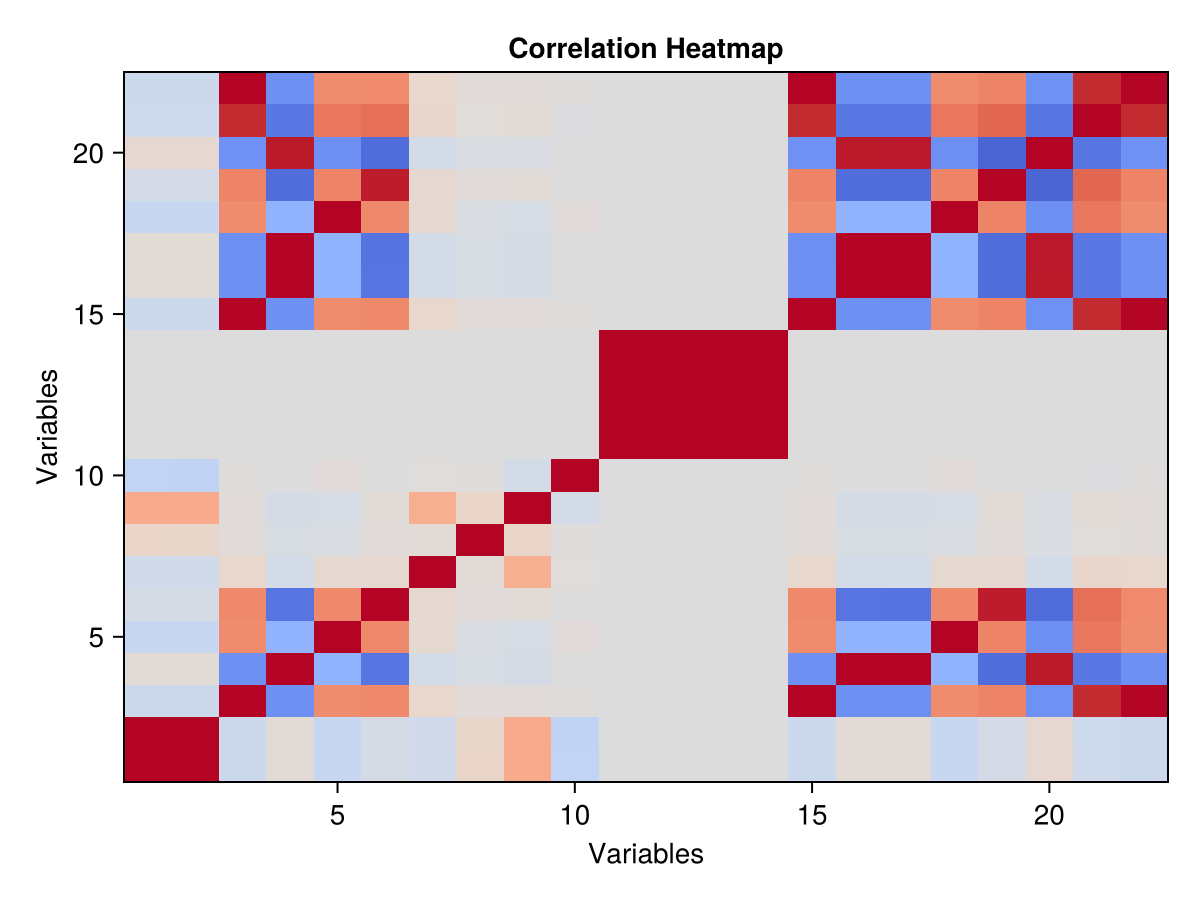

In [43]:
displayCorrelation(matrizCorrelacion3,ruta_fig_sin_quitar_correlaciones)

<h2> Función removeOutliersIQR</h2>

usando el rango intercuartílico elimina todos los valores atípicos de las columnas numéricas.

In [44]:
 # función para filtrar los puntos que son extremos usando el rango intercuantil
 function removeOutliersIQR(df::DataFrame)
    # Indentificar columnas numericas
     df2=df
     columns_to_remove=[]
     println("Longitud del df para remover outliers:")
     dataShape(df2)
     numeric_cols = filter(col_name -> eltype(df2[!, col_name]) <: Union{Number,Missing}, names(df2))
     println("Columnas numericas son: ",length(numeric_cols))
     n=0
    for col in numeric_cols
         n+=1
         if col in names(df2)
             # Calcula cuantiles: Q1, Q3, y su rango IQR
                 Q1 = quantile(filter(!ismissing, df[!, col]), 0.25)
                 Q3 = quantile(filter(!ismissing, df[!, col]), 0.75)
                 println(n,".-El Q1 de la columna: ", col, "es: ", Q1)
                 println(n,".-El promedio es:", mean(filter(!ismissing, df[!, col])))
                 println(n,".-El Q3 de la columna: ", col, "es: ", Q3)
                 println(n,".-El número de columnas vacías es: ", length(filter(ismissing, df[!, col])))
                 IQR = Q3 - Q1
                 if IQR ==0
                     push!(columns_to_remove, col)
                     println(n,".-Columna no representativa y a eliminar: ",col)
                 else
                     println(n,".-El valor de IQR del col: ",col, "es: ", IQR)
                     # Limites según outliers por intercuantiles: 
                     limite_inferior = Q1 - 1.5 * IQR
                     limite_superior = Q3 + 1.5 * IQR
                         #println(lower_bound,"|",upper_bound,"|",col)
                     # filtro del df por rango
                     df2 = filter(row -> !ismissing(row[col]) && row[col] >= limite_inferior && row[col] <= limite_superior, df2)
                     println("Filtro por IQR del renglon: ", col)
                     println(dataShape(df2))
                 end
             
             
         else
             println("El valor: ",col," fue removido del dataframe")
         end
    end
    return select(df2, Not(columns_to_remove))
 end

removeOutliersIQR (generic function with 1 method)

Ejemplo:

In [45]:
#Remover IQR
df5=removeOutliersIQR(df3)
println("Data Frame donde se eliminan renglones fuera del rango intercuantil")
dataShape(df5)

Longitud del df para remover outliers:
Número de filas: 864863
Número de columnas: 22
Columnas numericas son: 22
1.-El Q1 de la columna: Cst_Cntes: 8269.0
1.-El promedio es:17138.790957643003
1.-El Q3 de la columna: Cst_Cntes: 26557.0
1.-El número de columnas vacías es: 0
1.-El valor de IQR del col: Cst_Cntes: 18288.0
Filtro por IQR del renglon: Cst_Cnt
Número de filas: 864863
Número de columnas: 22
(864863, 22)
2.-El Q1 de la columna: Btl_Cntes: 216216.5
2.-El promedio es:432432.0
2.-El Q3 de la columna: Btl_Cntes: 648647.5
2.-El número de columnas vacías es: 0
2.-El valor de IQR del col: Btl_Cntes: 432431.0
Filtro por IQR del renglon: Btl_Cnt
Número de filas: 864863
Número de columnas: 22
(864863, 22)
3.-El Q1 de la columna: Depthmes: 46.0
3.-El promedio es:226.83195141889524
3.-El Q3 de la columna: Depthmes: 300.0
3.-El número de columnas vacías es: 0
3.-El valor de IQR del col: Depthmes: 254.0
Filtro por IQR del renglon: Depthm
Número de filas: 810084
Número de columnas: 22
(810084

(754652, 16)

<h2> Función deleteRow</h2>

para una columna dada, elimina todos los puntos de datos nulos.

Decidí que sería sólo si toda la matriz tiene datos nulos.

In [46]:
function deleteRow(df::DataFrame)
    # remueve filas solo si todos los valores son nulos, aplica para df o columnas de df
    clean_df = df[.![all(ismissing, row) for row in eachrow(df)], :]
    return clean_df
end

deleteRow (generic function with 1 method)

In [47]:
#Remover IQR
df4=deleteRow(df5)
println("Data Frame donde se eliminan renglones missing")
dataShape(df4)

Data Frame donde se eliminan renglones missing
Número de filas: 754652
Número de columnas: 16


(754652, 16)

<h2> Función filterColumnsByCorrelation</h2>

elimina todas las columnas en función del umbral dado para una columna objetivo y su relación (>, >=, =, <, <=).

In [48]:
function filterColumnsByCorrelation(df::DataFrame, target::String, threshold::Float64, relation::Function)
    # Manejo de errores inesperados
    try
        # Valida si el tarjet existe:
        if !(target in names(df))
            throw(ArgumentError("La columna $target no existe en el DataFrame"))
        end
        
         # Valida si el valor es numerico o nulo:
        if !(eltype(df[!,target]) <: Union{Number,Missing})
            throw(ArgumentError("La columna $target debe contener valores numericos"))
        end
        
        # Genera el vector para saber que columnas remover:
        columns_to_remove = []
        
        for col in names(df)
            #println("Columna evaluada: ",col)
            # Skipea target
            if col == target
                #println("Salto por la columna target")
                continue
            end
            
            # Valida si la columna es de tipo Number o Missing si es distinta a target
            if eltype(df[!,col]) <: Union{Number,Missing}
                # Nos quedamos con las columnas que sean de tipo numerico
                nonmissing_rows = .!(ismissing.(df[!,target]) .| ismissing.(df[!,col]))
                target_values = df[!,target][nonmissing_rows]
                column_values = df[!,col][nonmissing_rows]
                #println("nonmissing_rows: ",nonmissing_rows)
                #println("Valores de column: ",column_values)
                # Calcula correlación si hay más de dos valores:
                if length(target_values) > 1
                    correlation = cor(target_values, column_values)
                    #println("Correlación de la columna ",target,"con la columna",cor,"es: ",correlation)
                    # Aplica la correlación
                    if relation(threshold,correlation)
                        push!(columns_to_remove, col)
                    end
                else
                    #hace push si no hay valores que comparar
                    push!(columns_to_remove, col)
                end
            end
        end
        #println("Columnas a remover: ",length(columns_to_remove))
        return select(df, Not(columns_to_remove))
    catch
        throw(ArgumentError("Error de procesamiento"))
    end
     # Regresa el DataFrame sin las columnas que no pasan el threshold o que no tienen data suficiente:
end


filterColumnsByCorrelation (generic function with 1 method)

Ejemplo:

Dict{Any, Any}("Cst_Cnt" => ["Btl_Cnt"], "T_degC" => ["R_TEMP", "R_POTEMP", "R_SVA"], "Salnty" => ["R_SALINITY"], "S_prec" => String[], "Depthm" => ["R_Depth", "R_DYNHT", "R_PRES"], "STheta" => ["R_SIGMA"], "RecInd" => String[])
Número de filas: 754652
Número de columnas: 7
entrar a crear mapa
/Users/fau/Documents/Code/Code/00-fork-diplomado-ia/diplomado-ia/julia/src/student_submissions/exploratory_data_analysis/morales_fausto/Exercise01/fig/Low_Correlation_heatmap.png
Inicio heatmap


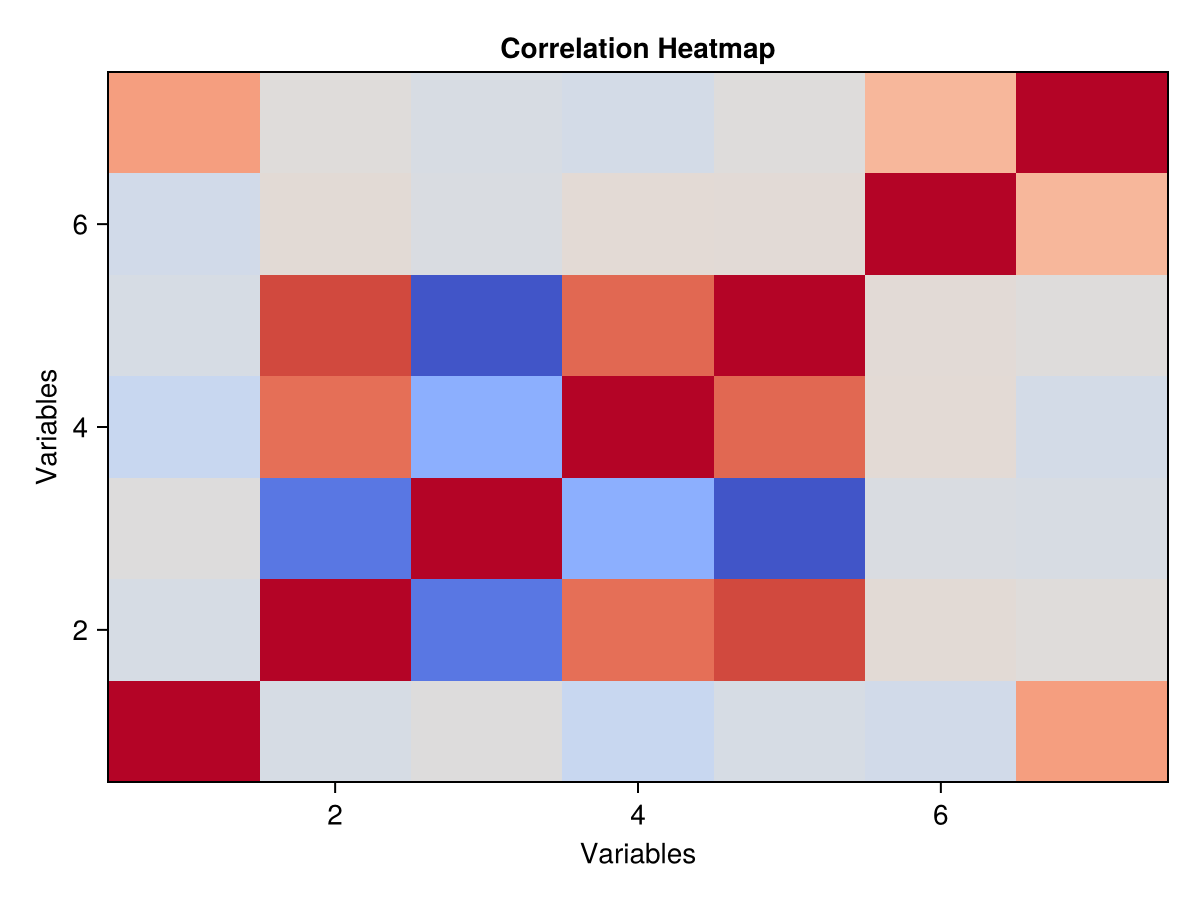

In [49]:
            #----A partir de un threshold determinar columnas con alta correlación:
            threshold2=0.90
            relation= >=
            variablesCorrelacionadas, df6=dfCorrelaciónYDiccionario(df5, threshold2, relation)
            println(variablesCorrelacionadas)
            dataShape(df6) 
            #----Calculo de matriz de correlación
            matrizCorrelacion=calculateCorrelation(df6)
            #----crear mapa de color
            displayCorrelation(matrizCorrelacion,ruta_fig_baja_correlacion)

<h2> Función describe</h2>

se utiliza para describir los datos proporcionando lo siguiente para cada columna.

In [50]:
function describe_columns(df::DataFrame)
    for col in names(df)
        println("Descripción de la columna: $col")
        println(describe(df[:, col]))
        println("-"^40)
    end
end

describe_columns (generic function with 1 method)

Ejemplo:

In [51]:
describe_columns(df6)

Descripción de la columna: Cst_Cnt
Summary Stats:
Length:         754652
Missing Count:  0
Mean:           18304.857961
Minimum:        1.000000
1st Quartile:   9871.000000
Median:         18686.500000
3rd Quartile:   27472.000000
Maximum:        34404.000000
Type:           Int64
nothing
----------------------------------------
Descripción de la columna: Depthm
Summary Stats:
Length:         754652
Missing Count:  0
Mean:           167.636436
Minimum:        0.000000
1st Quartile:   41.000000
Median:         117.000000
3rd Quartile:   250.000000
Maximum:        681.000000
Type:           Int64
nothing
----------------------------------------
Descripción de la columna: T_degC
Summary Stats:
Length:         754652
Missing Count:  0
Mean:           11.196208
Minimum:        3.650000
1st Quartile:   8.190000
Median:         10.400000
3rd Quartile:   14.080000
Maximum:        23.180000
Type:           Union{Missing, Float64}
nothing
----------------------------------------
Descripción de l